In [28]:
from tensorflow.keras.applications import ResNet50
#preprocess the image before passing to the ResNet50 model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, MaxPool2D, Flatten
from keras.optimizers import SGD, Adam

import matplotlib.pyplot as plt

In [29]:
model = Sequential()

In [30]:
model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'avg'))

In [31]:
model.add(Dense(2,activation = 'softmax'))

In [32]:
model.layers[0].trainable = False

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_1 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [34]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [35]:
from keras.preprocessing.image import ImageDataGenerator 

In [36]:
data_generator = ImageDataGenerator(preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

In [37]:
train_generator = data_generator.flow_from_directory(
    directory = 'images/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 220 images belonging to 2 classes.


In [38]:
val_generator = data_generator.flow_from_directory(
    directory = 'images/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 217 images belonging to 2 classes.


In [39]:
history = model.fit(train_generator, epochs=10, batch_size = 8,
                    validation_data=val_generator)

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
7/7 [==============================] - 23s 3s/step - loss: 0.8279 - accuracy: 0.5727 - val_loss: 0.6546 - val_accuracy: 0.6267
Epoch 2/10
7/7 [==============================] - 21s 3s/step - loss: 0.4195 - accuracy: 0.8091 - val_loss: 0.4792 - val_accuracy: 0.7558
Epoch 3/10
7/7 [==============================] - 21s 3s/step - loss: 0.2772 - accuracy: 0.8909 - val_loss: 0.2895 - val_accuracy: 0.8664
Epoch 4/10
7/7 [==============================] - 22s 3s/step - loss: 0.1676 - accuracy: 0.9500 - val_loss: 0.2160 - val_accuracy: 0.9171
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.1226 - accuracy: 0.9636 - val_loss: 0.1697 - val_accuracy: 0.9539
Epoch 6/10
7/7 [==============================] - 21s 3s/step - loss: 0.0836 - accuracy: 0.9818 - val_loss: 0.1521 - val_accuracy: 0.9309
Epoch 7/10
7/7 [==============================] - 21s 3s/step - loss: 0.0798 - accuracy: 0.9773 - val_loss: 0.1645 - val_accuracy: 0.9217
Epoch 8/10
7/7 [==================

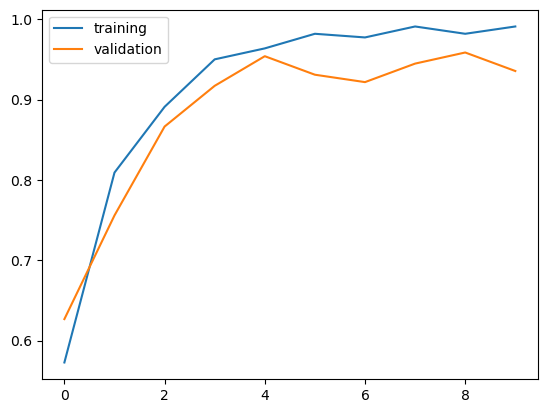

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [42]:
import numpy as np
pred = np.argmax(model.predict(val_generator), axis = 1)

7/7 [==============================] - 11s 1s/step


In [43]:
actual = val_generator.labels

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
confusion_matrix(actual, pred)

array([[56, 54],
       [58, 49]])

In [46]:
accuracy_score(actual, pred)

0.4838709677419355

In [47]:
pred_train = np.argmax(model.predict(train_generator), axis = 1)


/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


7/7 [==============================] - 10s 1s/step


In [48]:
actual_train = train_generator.labels

In [49]:
confusion_matrix(actual_train, pred_train)

array([[60, 51],
       [53, 56]])

In [50]:
accuracy_score(actual_train, pred_train)

0.5272727272727272

In [35]:
def add(a,b):
    return a+b

In [36]:
add(2,4)

6

In [37]:
add(2,"dsd")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [65]:
def addition(a,b):    
    if (isinstance(a, int)) and (isinstance(b, int)):
            return add(a,b)
    else:
        print('check the data type is int')
    


In [67]:
addition(3,'s')

check the data type is int
